In [1]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pair_attrs = json.load(open("effect_pair_attr_mat.json"))

In [3]:
pair_attrs_df = pd.DataFrame(pair_attrs)

In [4]:
pair_attrs_df.sample(10)

,attribute_1,attribute_2,P
3,sex,Walc,2.234346e-02
1,school,goout,1.399782e-02
5,Medu,Fedu,2.633004e-04
9,Fedu,failures,6.862419e-09
2,sex,activities,9.257199e-03
4,age,guardian,4.411413e-02
7,Medu,schoolsup,1.059385e-02
21,nursery,higher,3.164795e-02
15,guardian,failures,9.298154e-03
24,higher,Walc,4.876733e-02


In [5]:
por = pd.read_csv("student-mat.csv", sep=";")

In [6]:
por.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
73,GP,M,16,U,GT3,T,3,1,other,other,...,5,3,2,2,2,5,2,12,12,14
303,GP,F,17,U,GT3,T,3,2,health,health,...,5,2,2,1,2,5,0,17,17,18
168,GP,F,16,U,GT3,T,2,2,other,other,...,5,1,5,1,1,4,0,6,7,0
383,MS,M,19,R,GT3,T,1,1,other,services,...,4,3,2,1,3,5,0,6,5,0
125,GP,M,15,U,GT3,T,3,4,services,services,...,5,5,5,3,2,5,0,13,13,12
239,GP,M,18,U,GT3,T,2,2,other,services,...,5,5,4,3,5,2,0,7,7,0
370,MS,F,19,U,LE3,T,3,2,services,services,...,3,2,2,1,1,3,4,7,7,9
374,MS,F,18,R,LE3,T,4,4,other,other,...,5,4,4,1,1,1,0,19,18,19
158,GP,M,16,R,GT3,T,2,2,at_home,other,...,4,2,2,1,2,3,2,17,15,15
175,GP,M,17,U,LE3,T,4,3,teacher,other,...,4,4,4,4,4,4,4,10,9,9


In [7]:
def nbox_plot(names, size):
  plt.figure(figsize=(16,12))
  for i,name in enumerate(names):
    plt.subplot(size[0], size[1], i+1)
    sns.boxplot(x=name, y='G3', data=por)
    plt.tight_layout()

/tmp/ipykernel_9881/2409968838.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16,12))


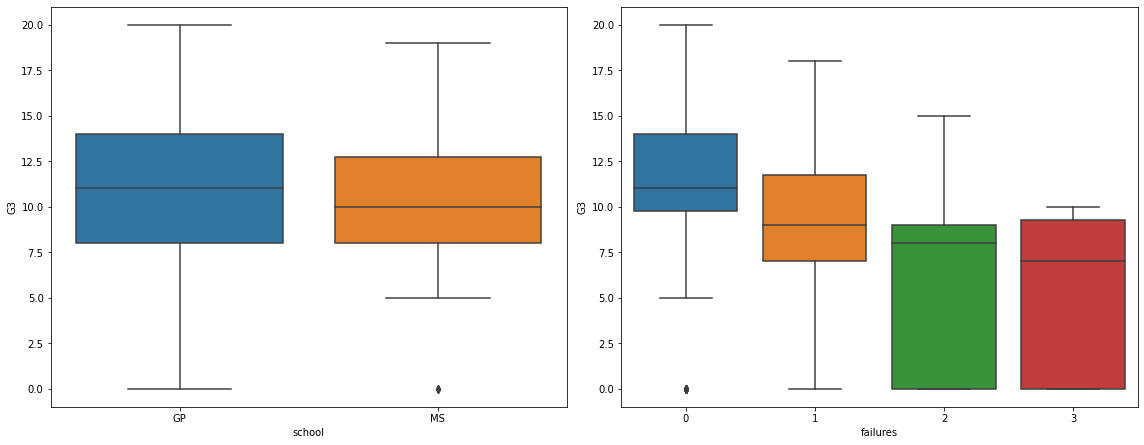

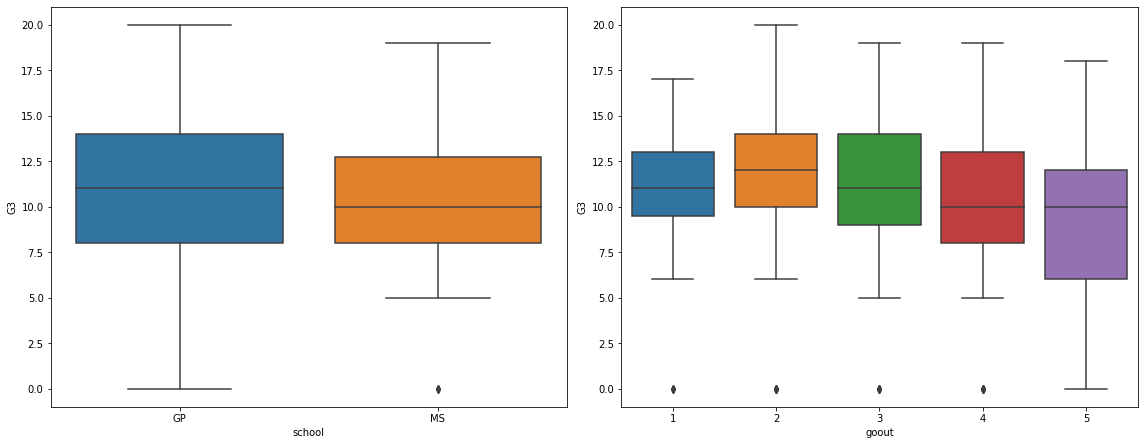

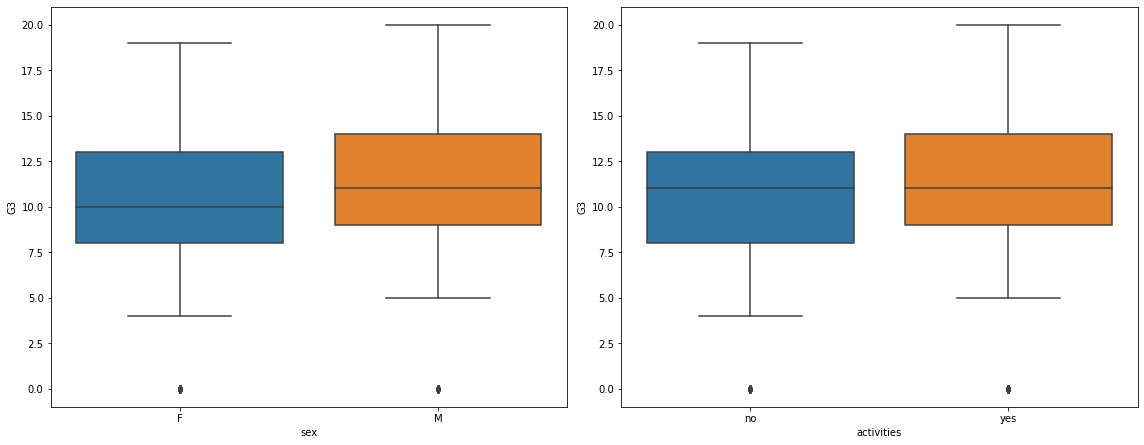

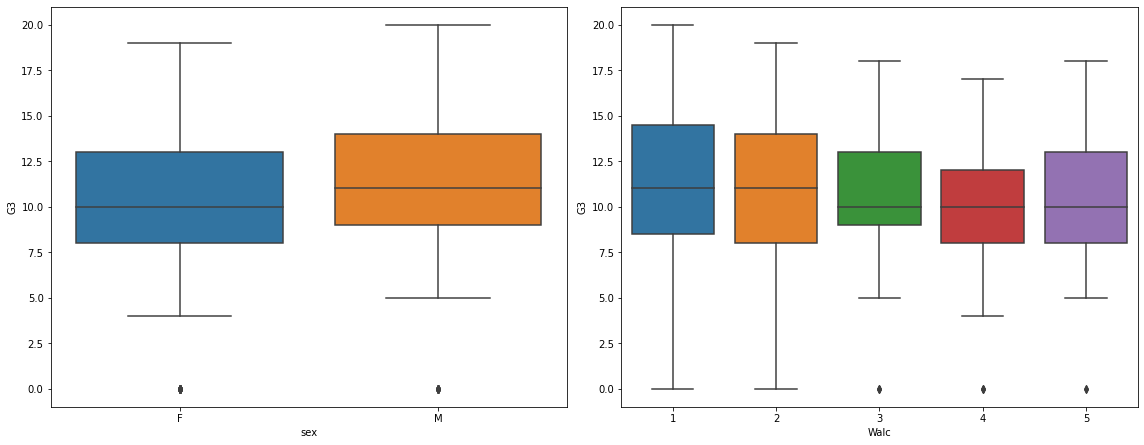

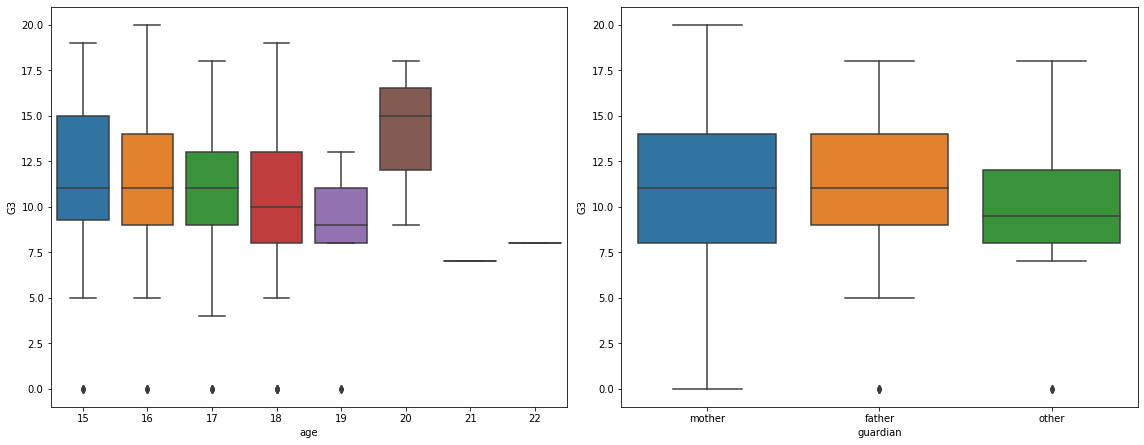

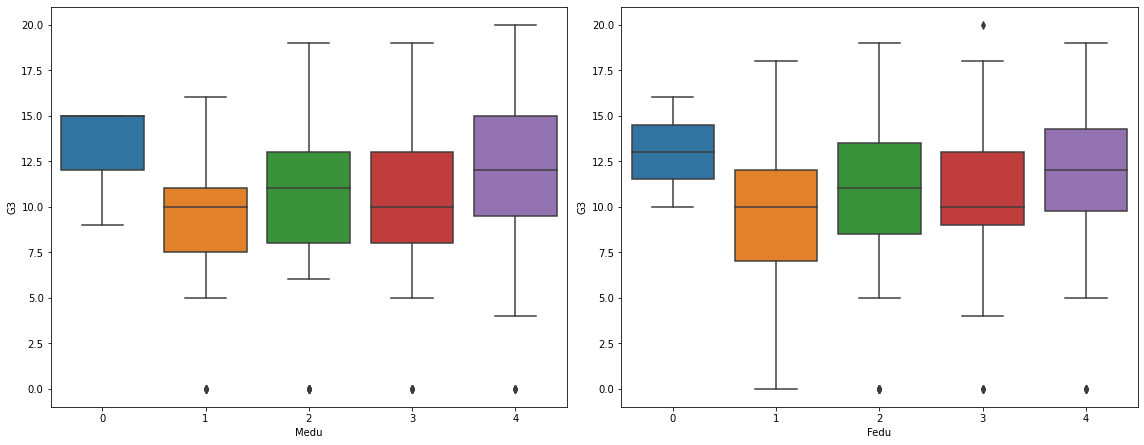

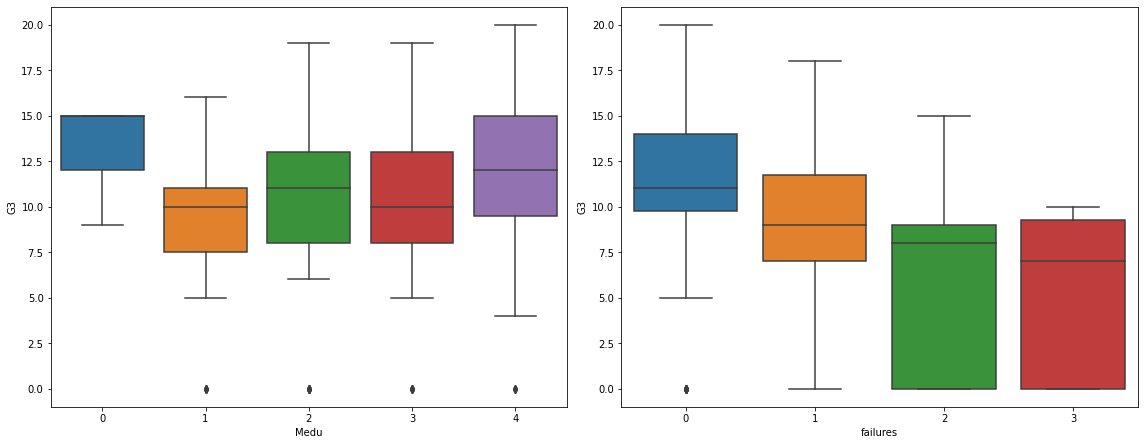

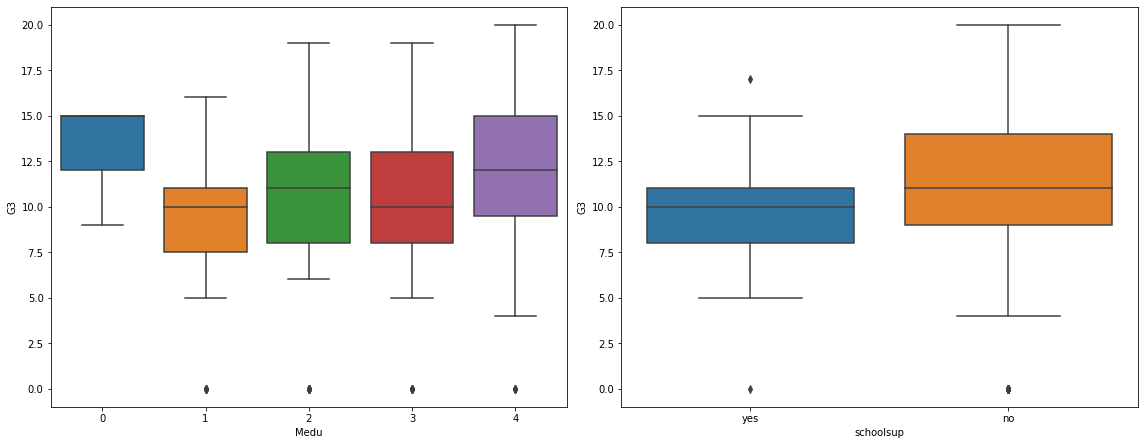

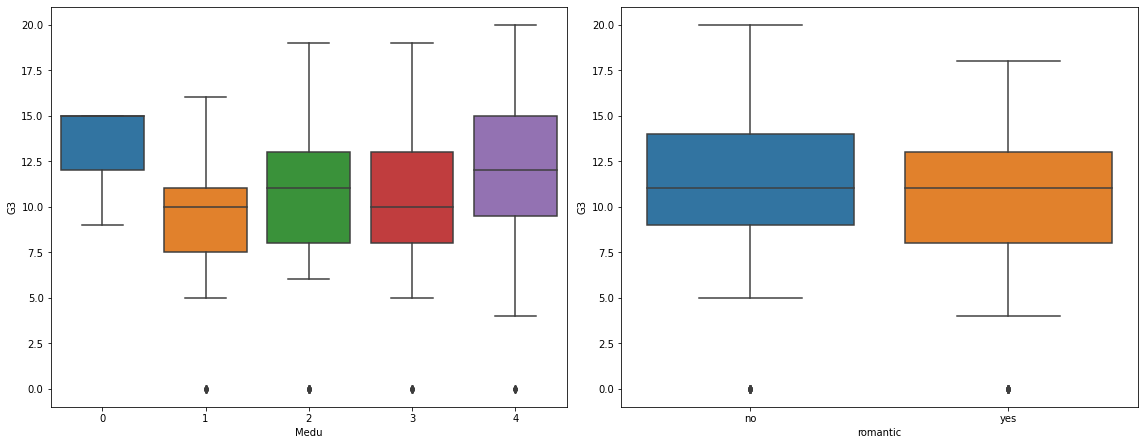

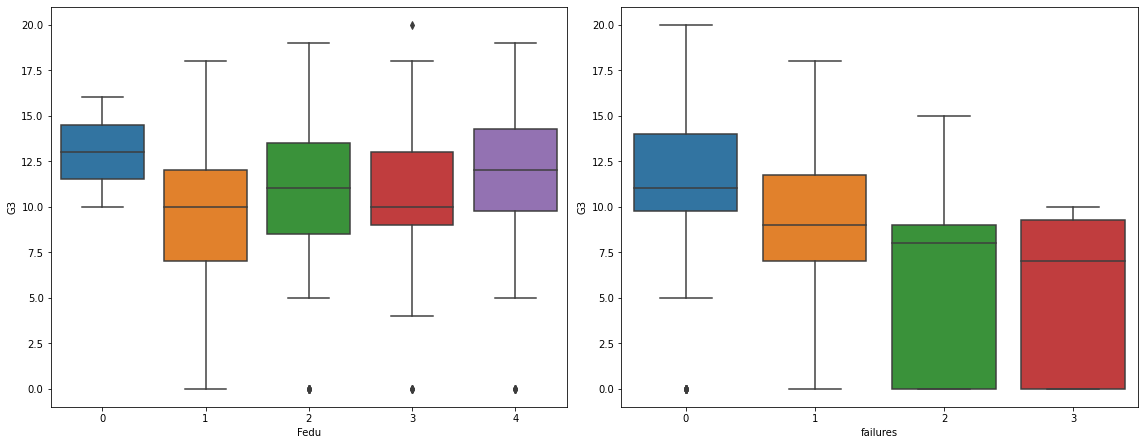

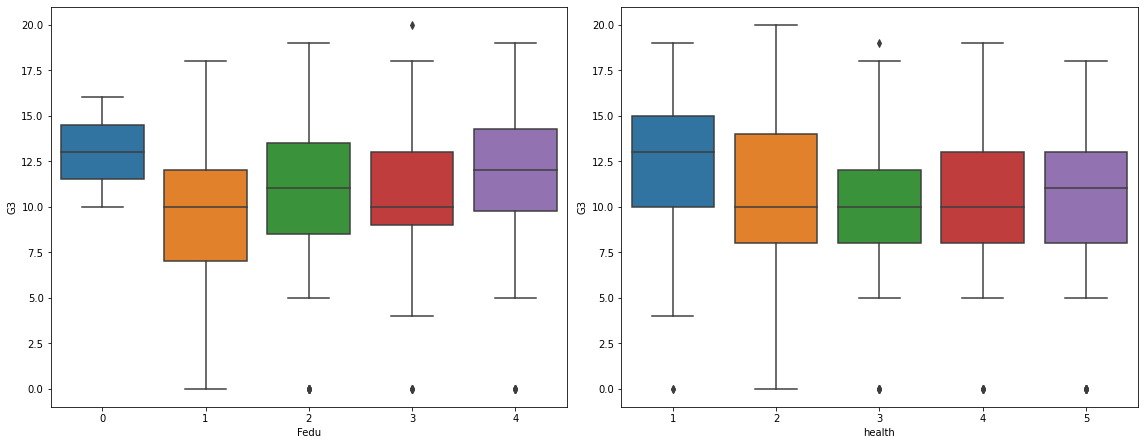

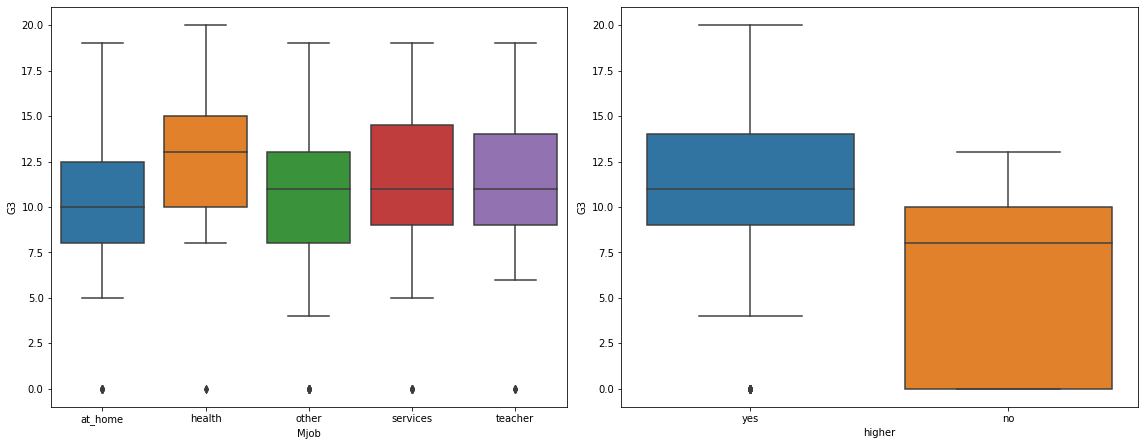

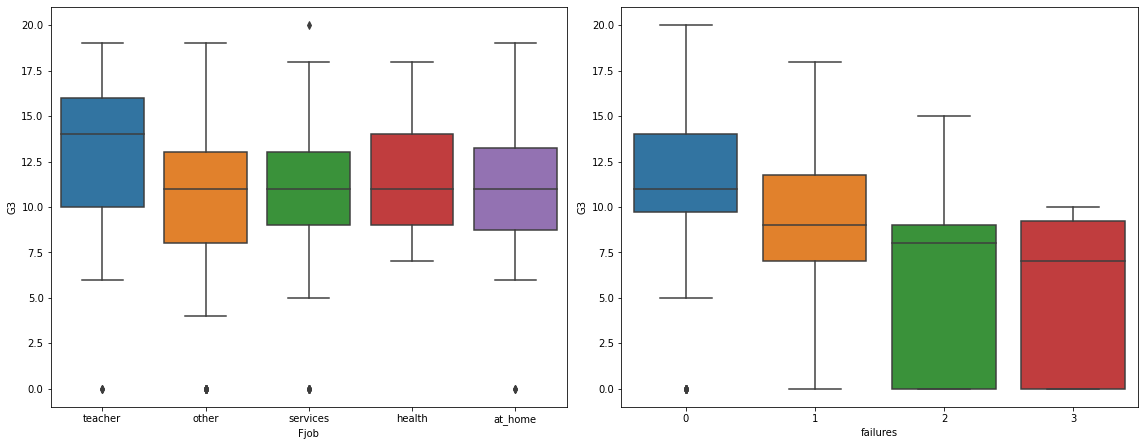

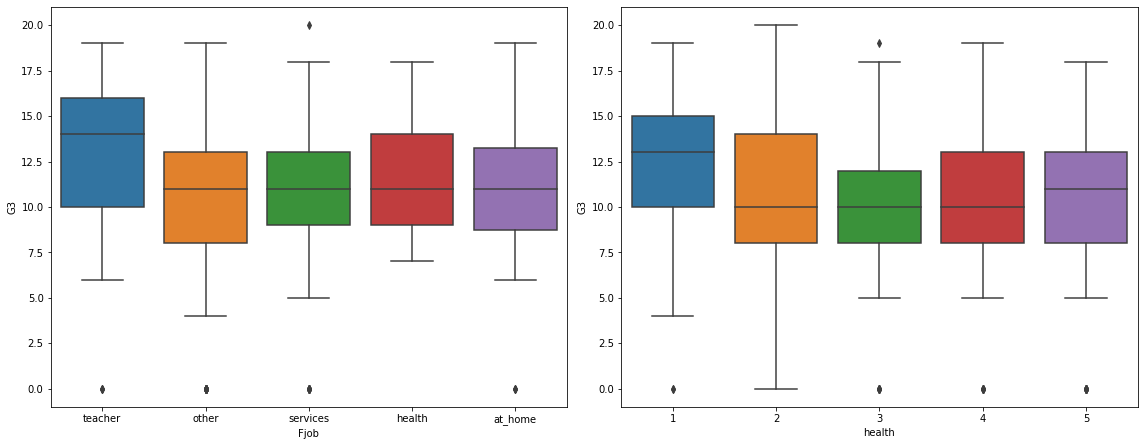

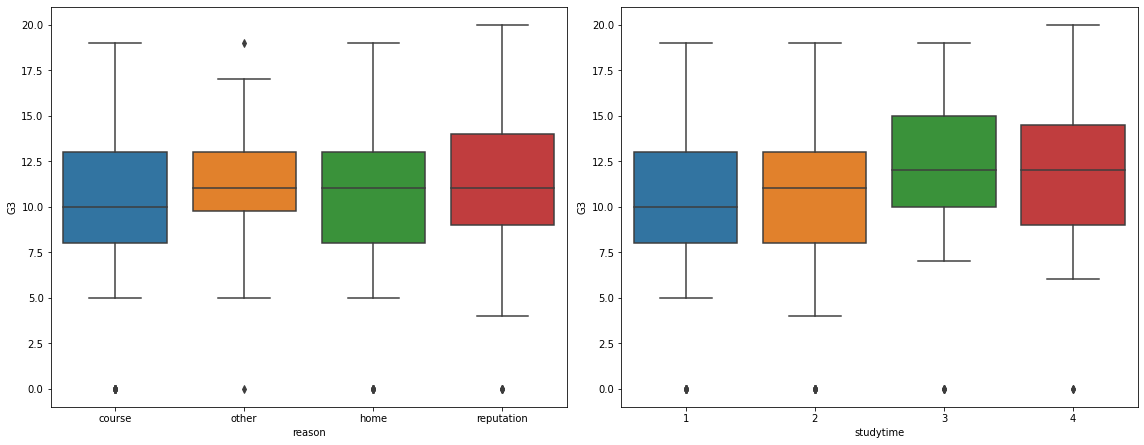

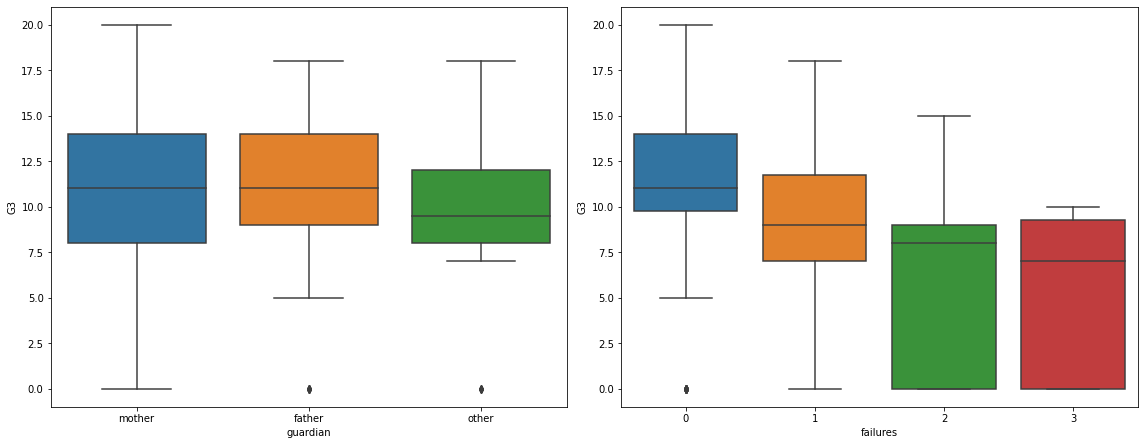

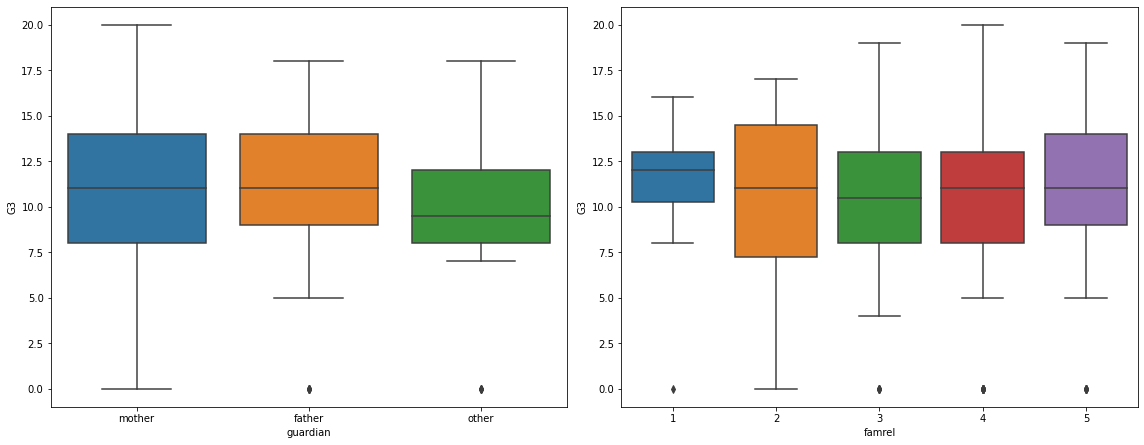

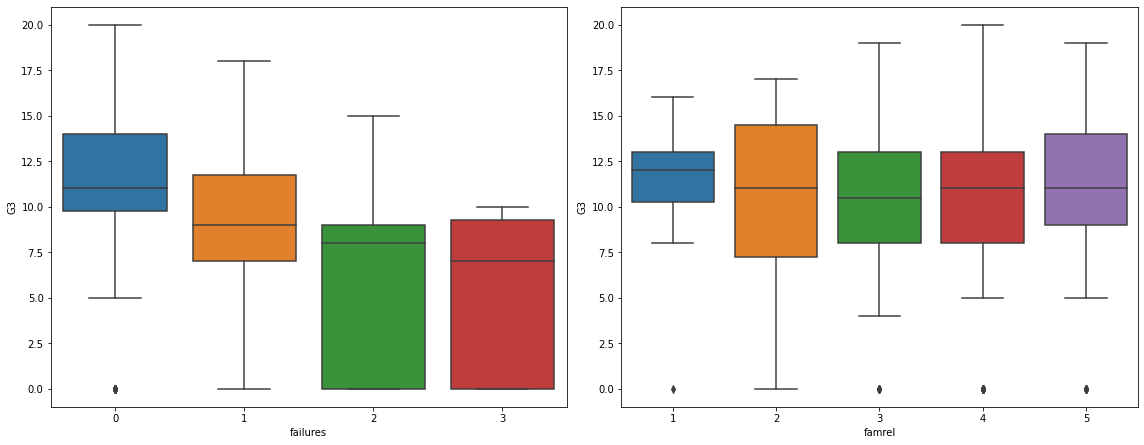

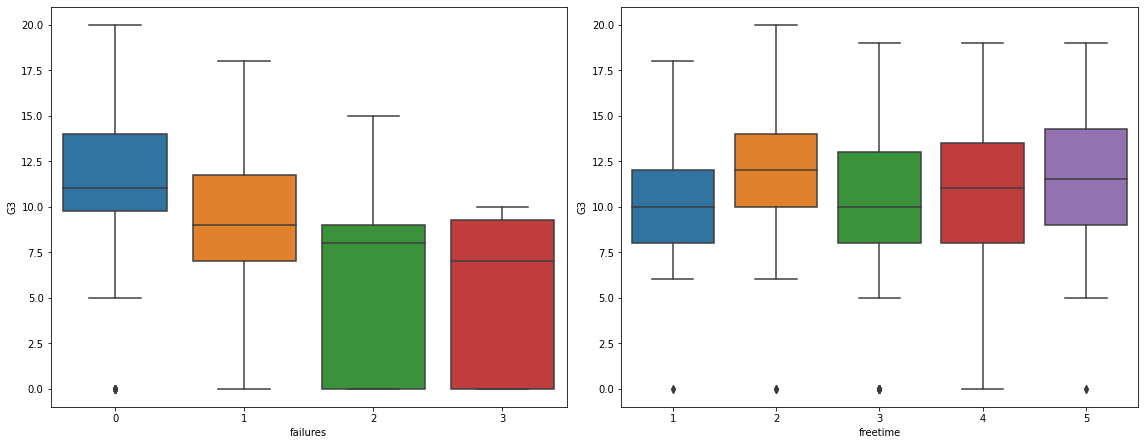

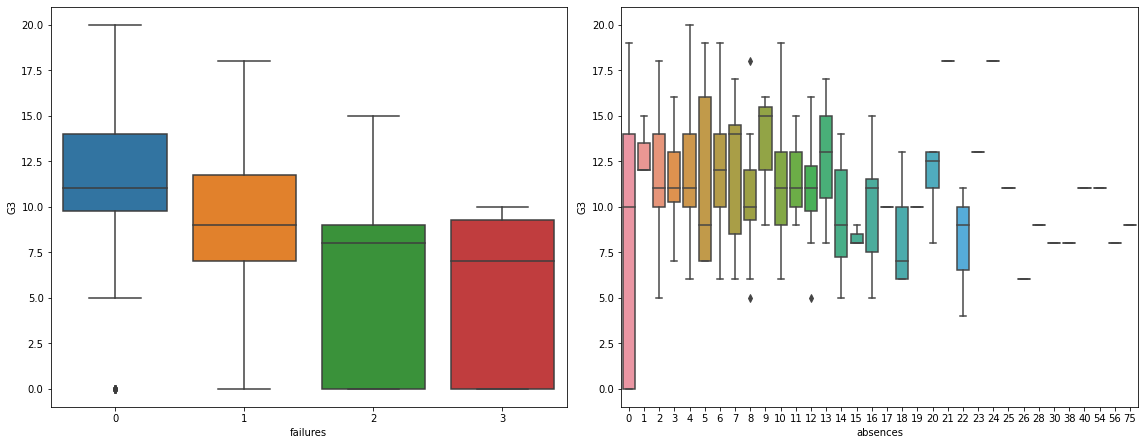

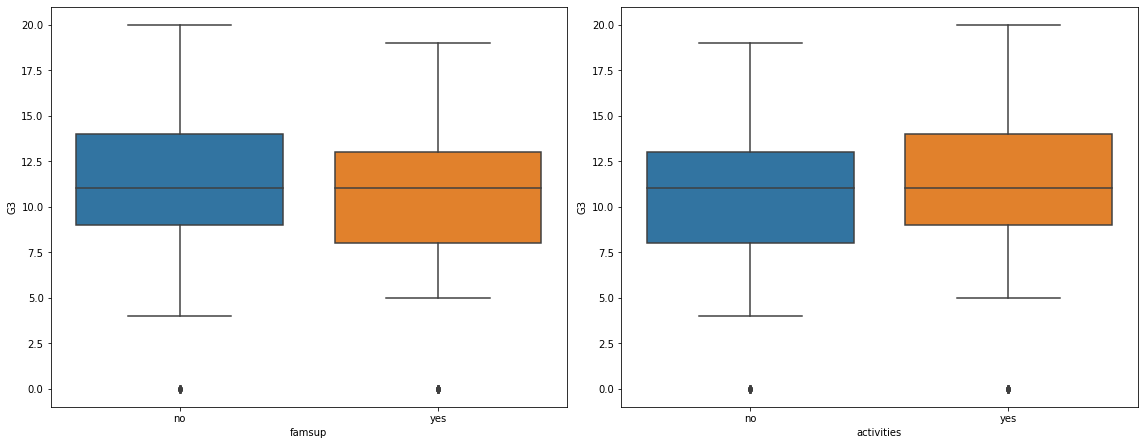

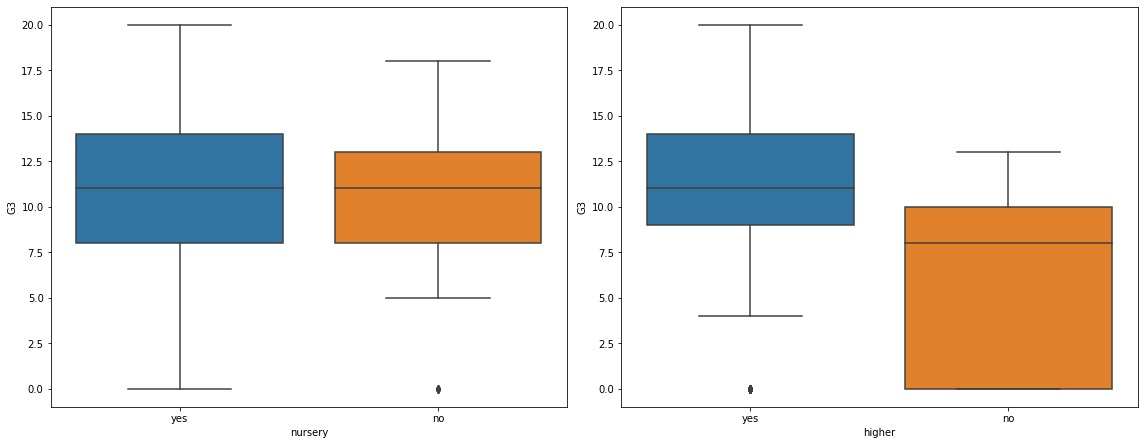

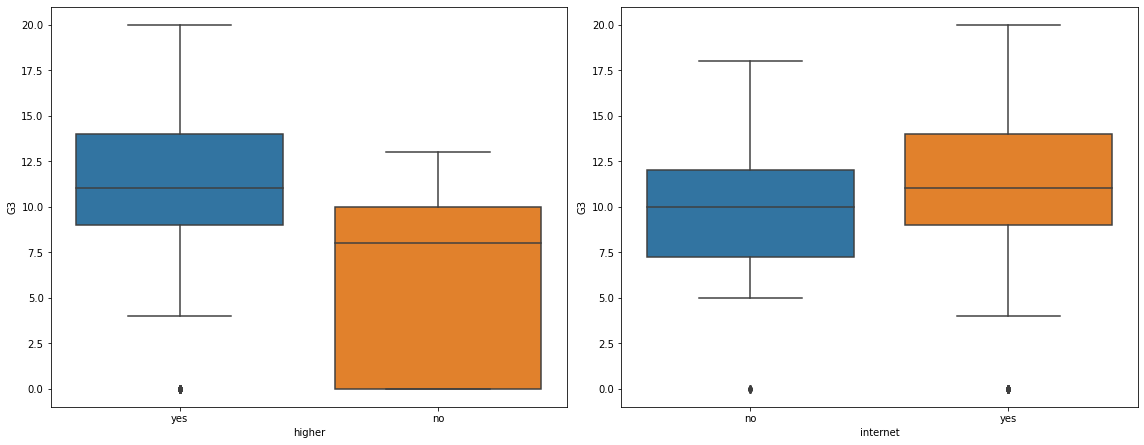

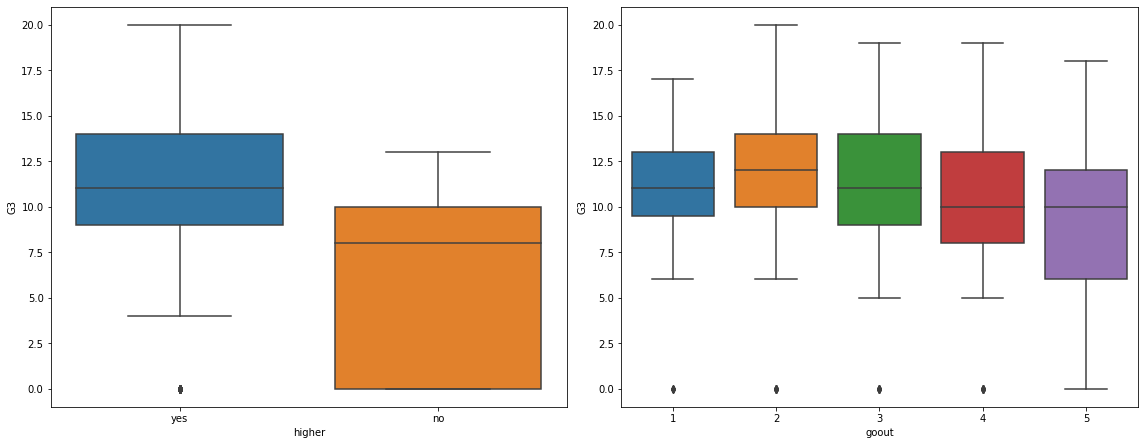

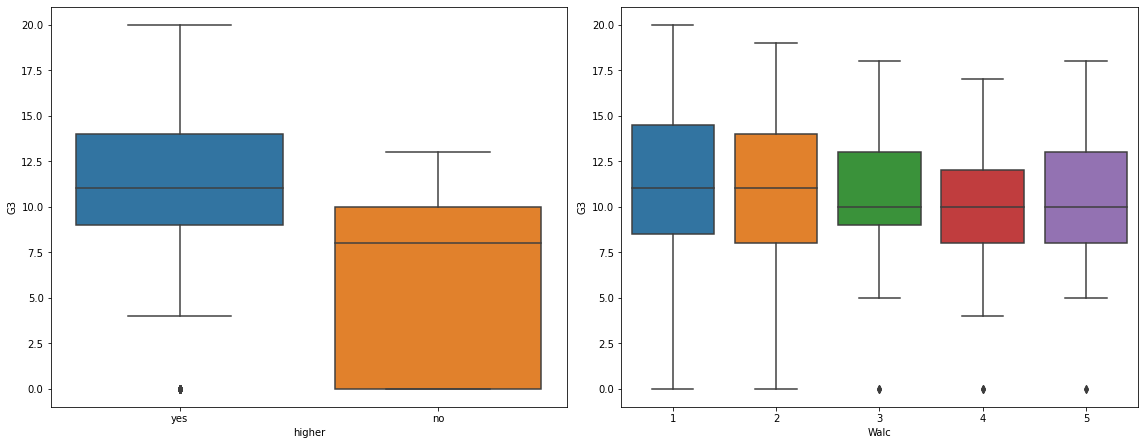

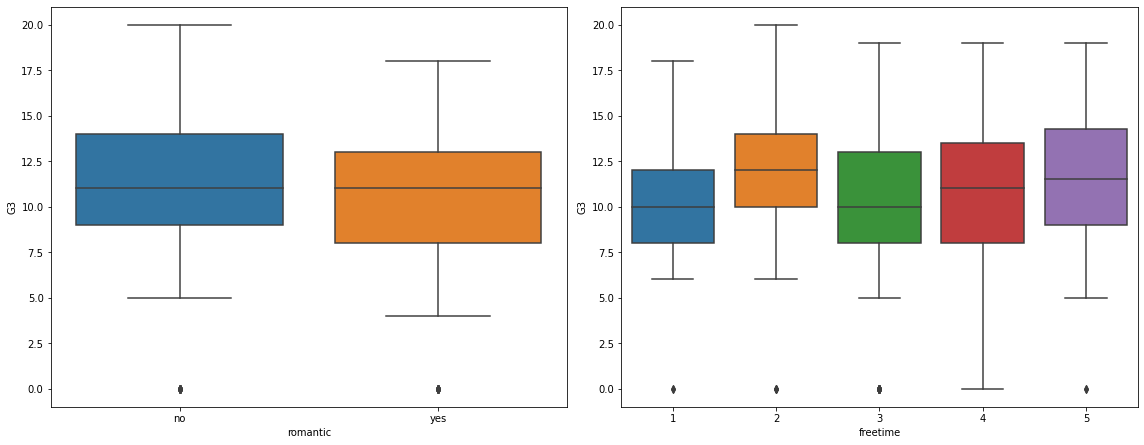

In [8]:
for sample in pair_attrs:
    nbox_plot([sample["attribute_1"], sample["attribute_2"]], (2, 2))

In [9]:
tmp_dfs = []
for sample in pair_attrs:
    tmp_df = por[[sample["attribute_1"], sample["attribute_2"], "G3"]]
    tmp_df.loc[:, f"{sample['attribute_1']}-{sample['attribute_2']}"] = tmp_df.loc[:, sample['attribute_1']].astype(str) + "-" + tmp_df.loc[:, sample['attribute_2']].astype(str)
    tmp_dfs.append(tmp_df)

/home/nguyennghiauit/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [10]:
tmp_dfs[1]

,school,goout,G3,school-goout
0,GP,4,6,GP-4
1,GP,3,6,GP-3
2,GP,2,10,GP-2
3,GP,2,15,GP-2
4,GP,2,10,GP-2
...,...,...,...,...
390,MS,4,9,MS-4
391,MS,5,16,MS-5
392,MS,3,7,MS-3
393,MS,1,10,MS-1


/tmp/ipykernel_9881/3957139089.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16, 12))


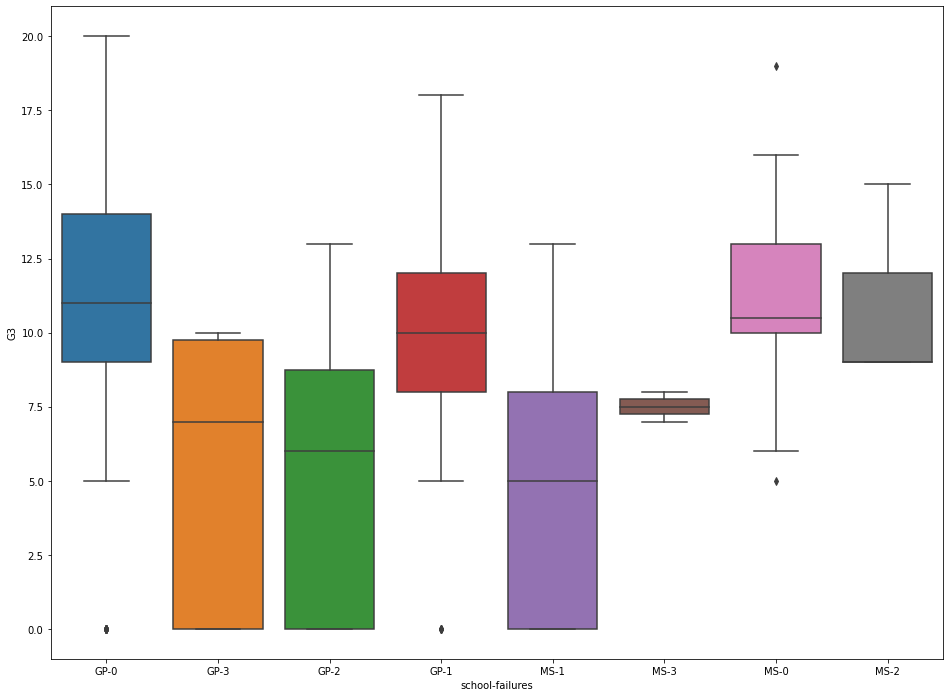

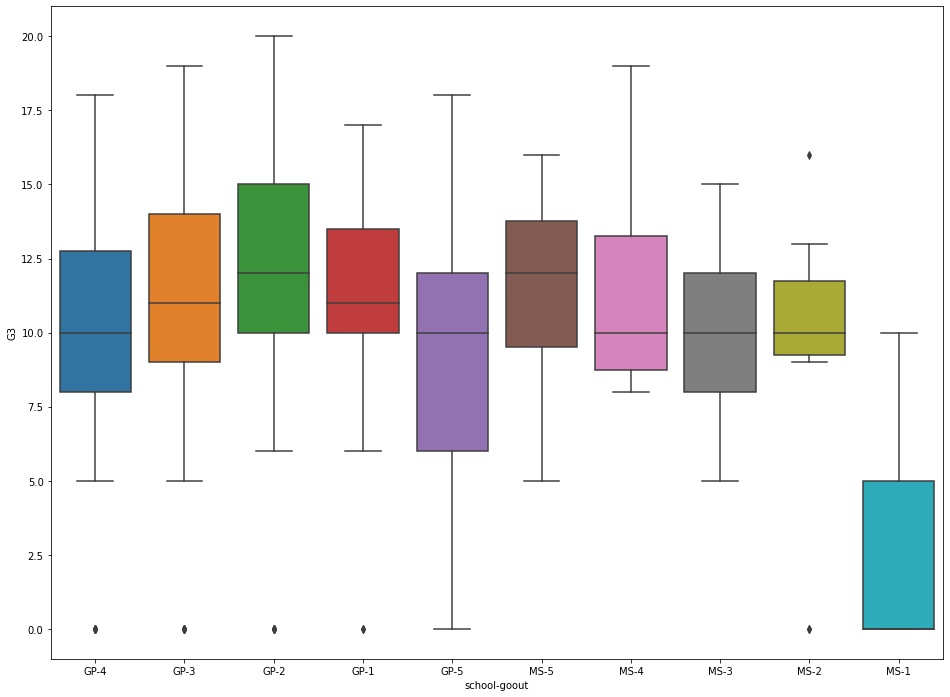

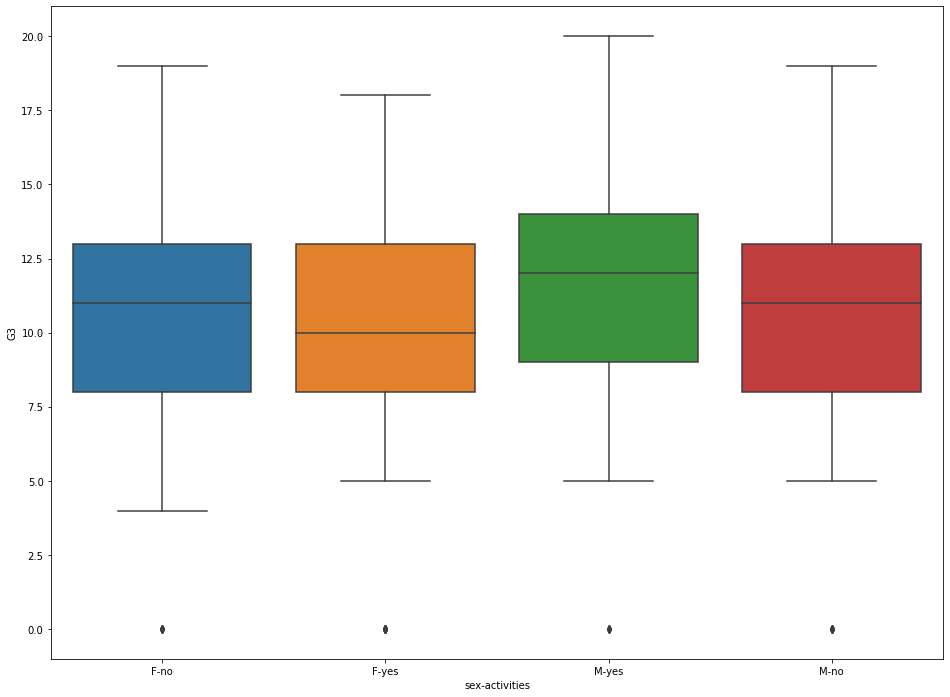

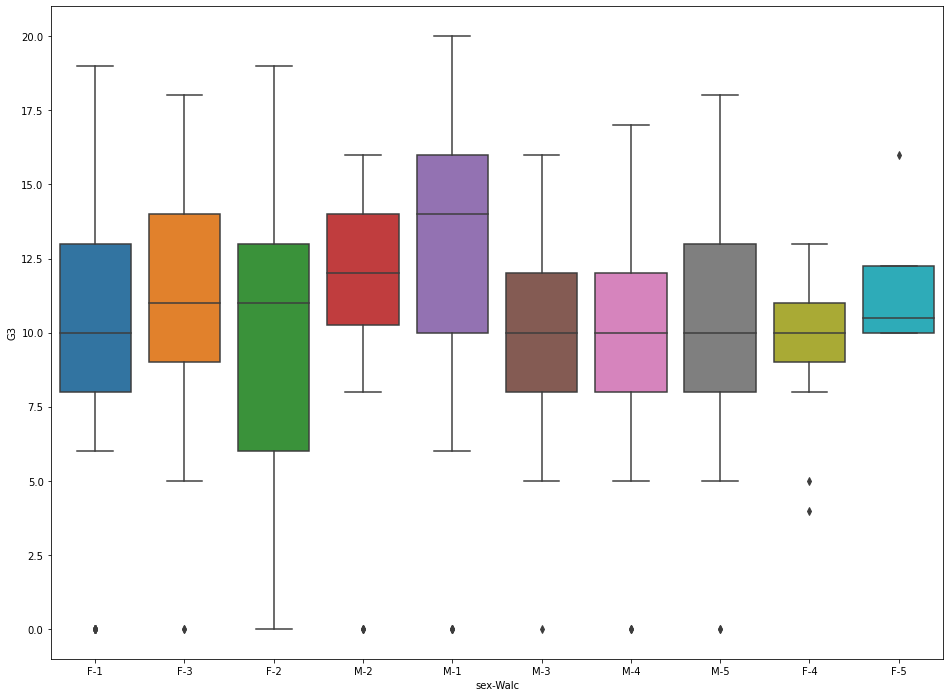

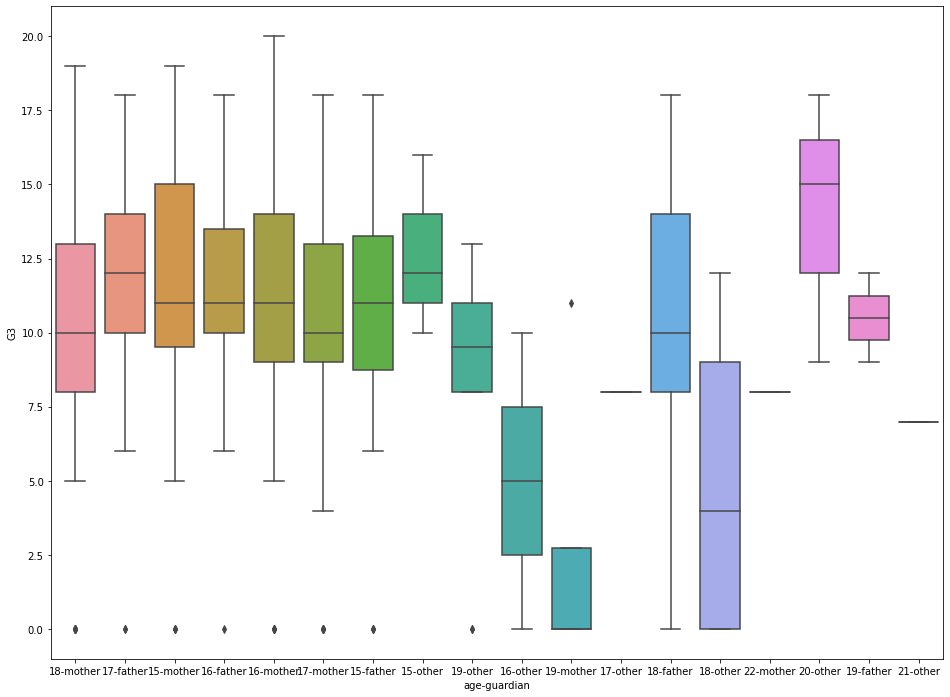

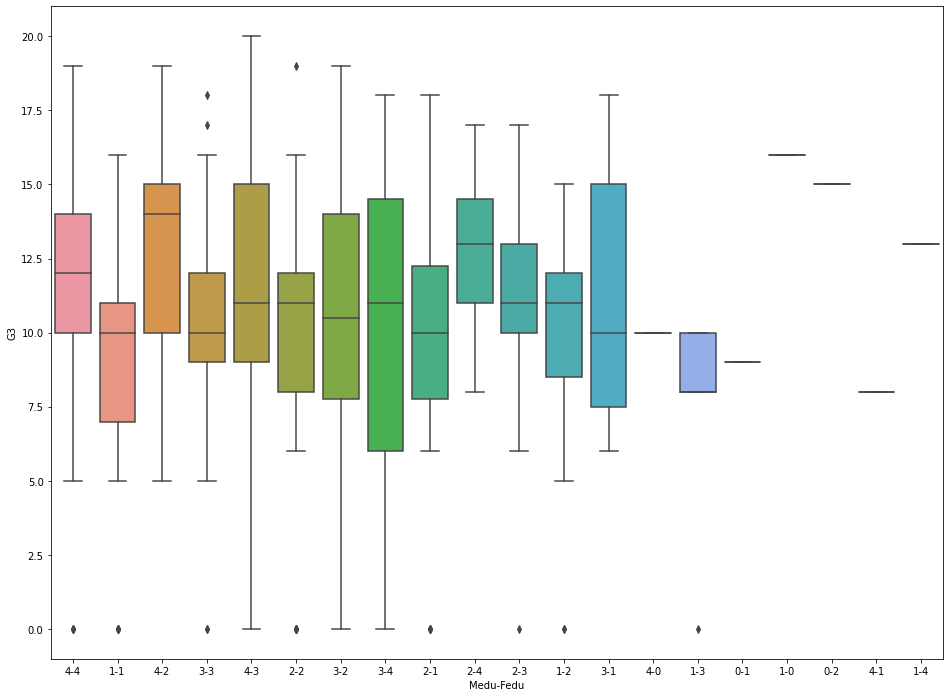

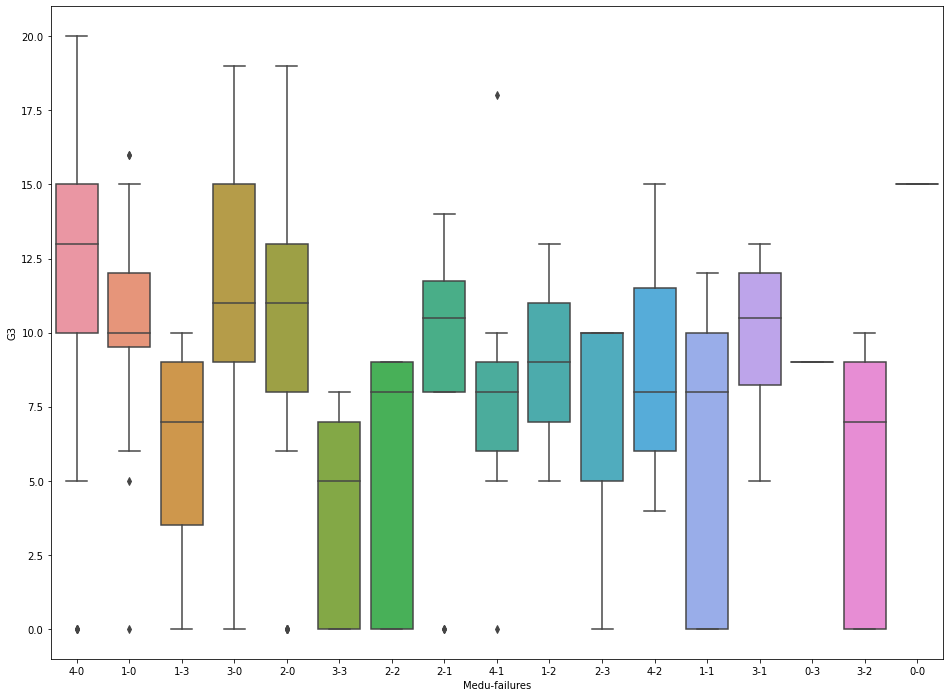

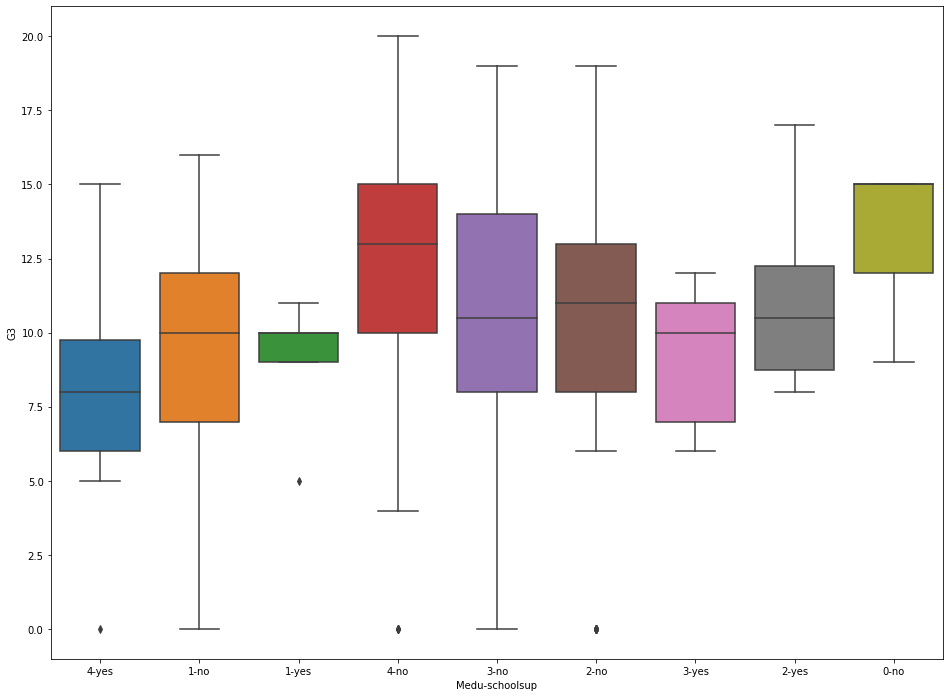

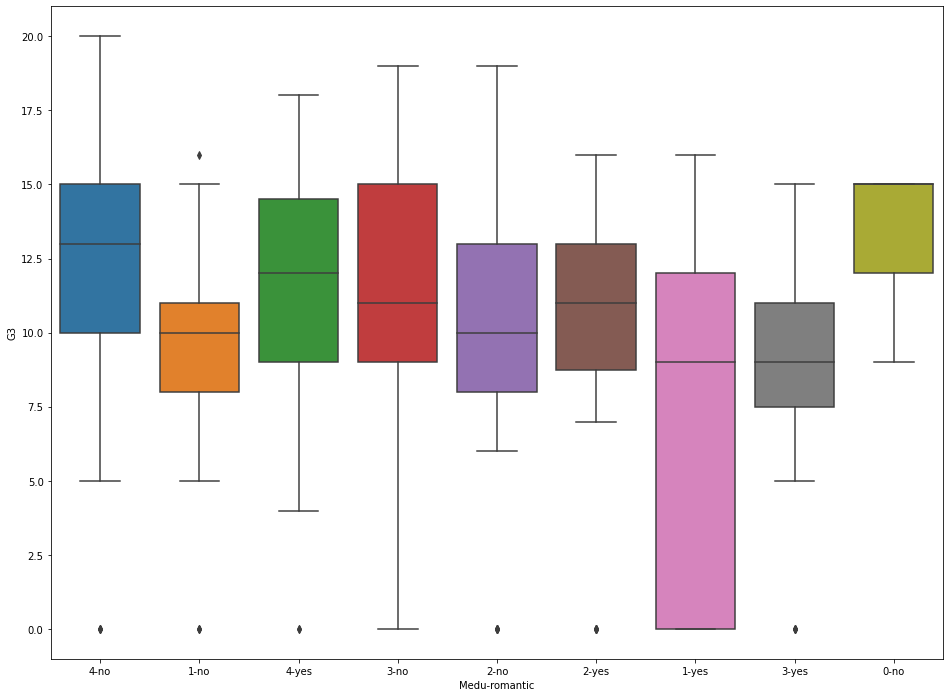

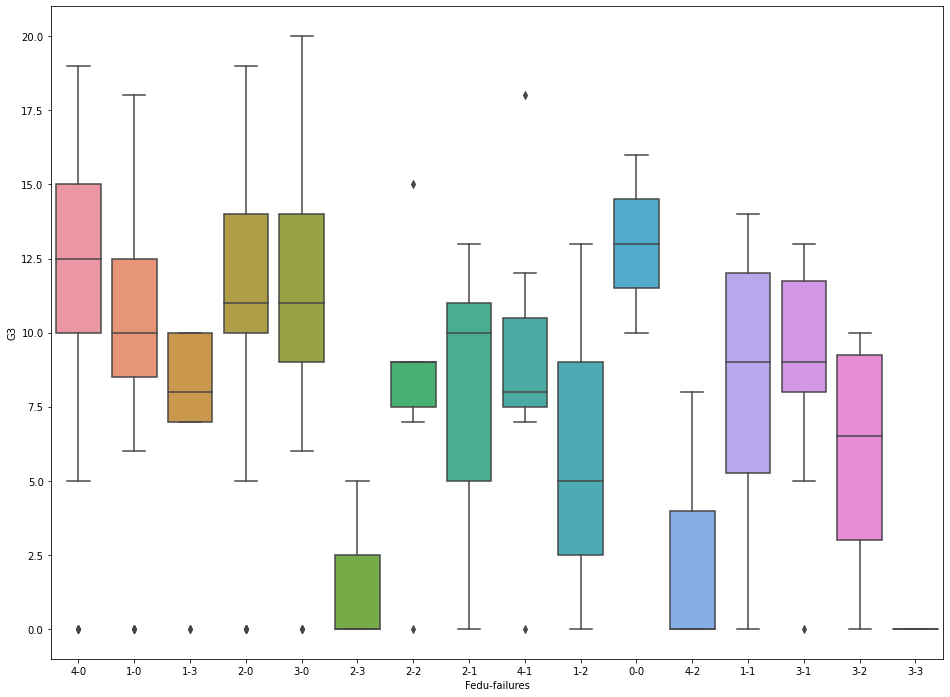

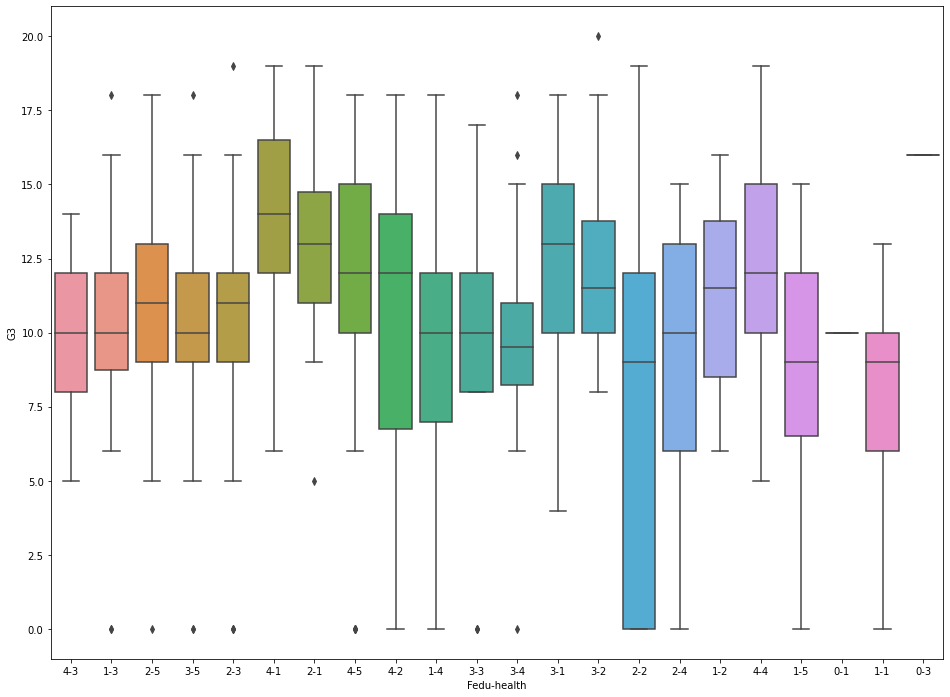

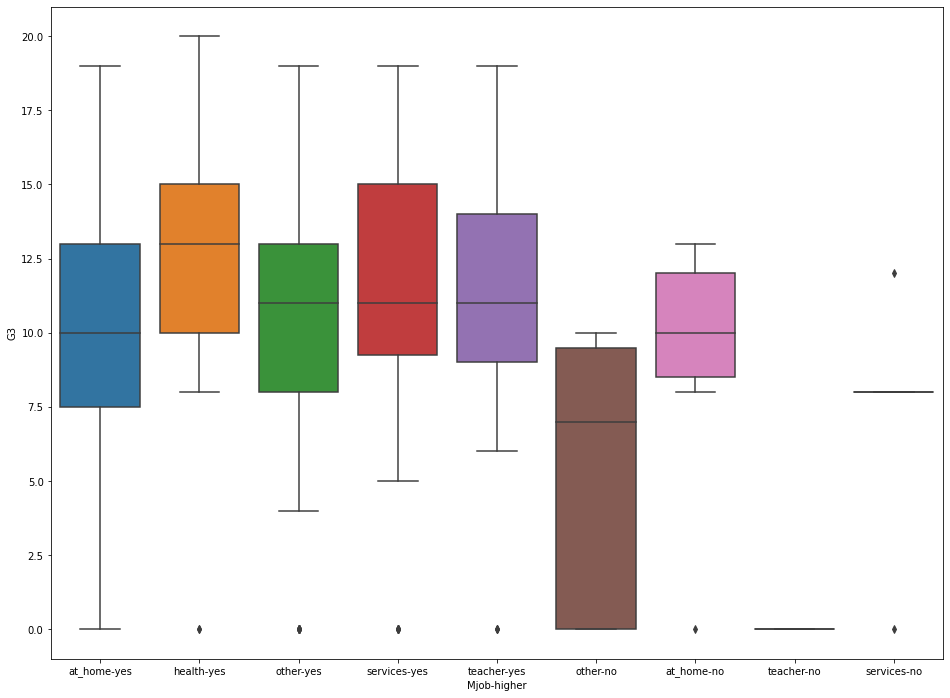

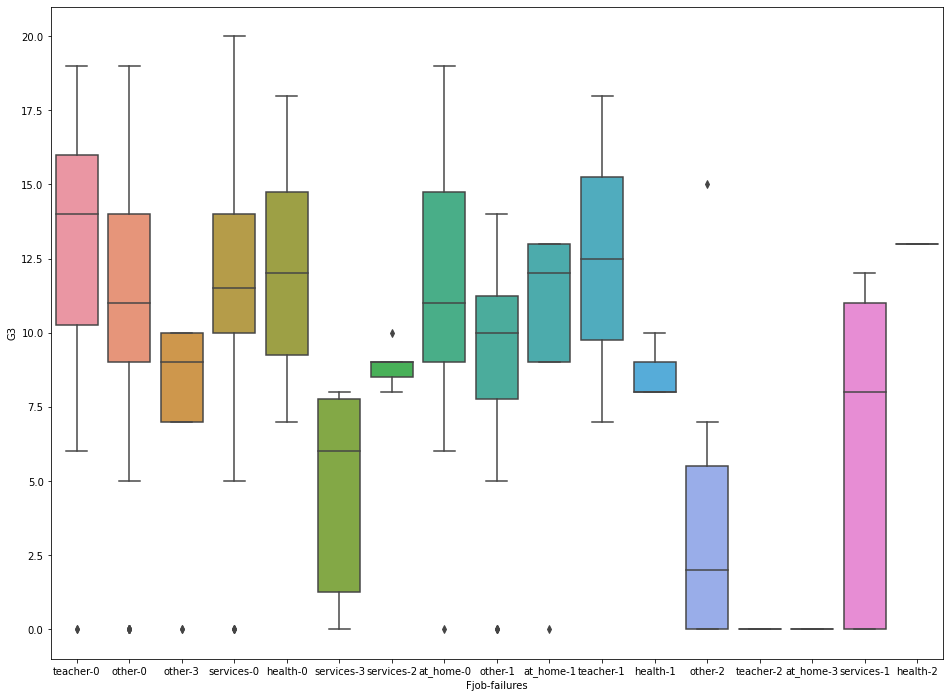

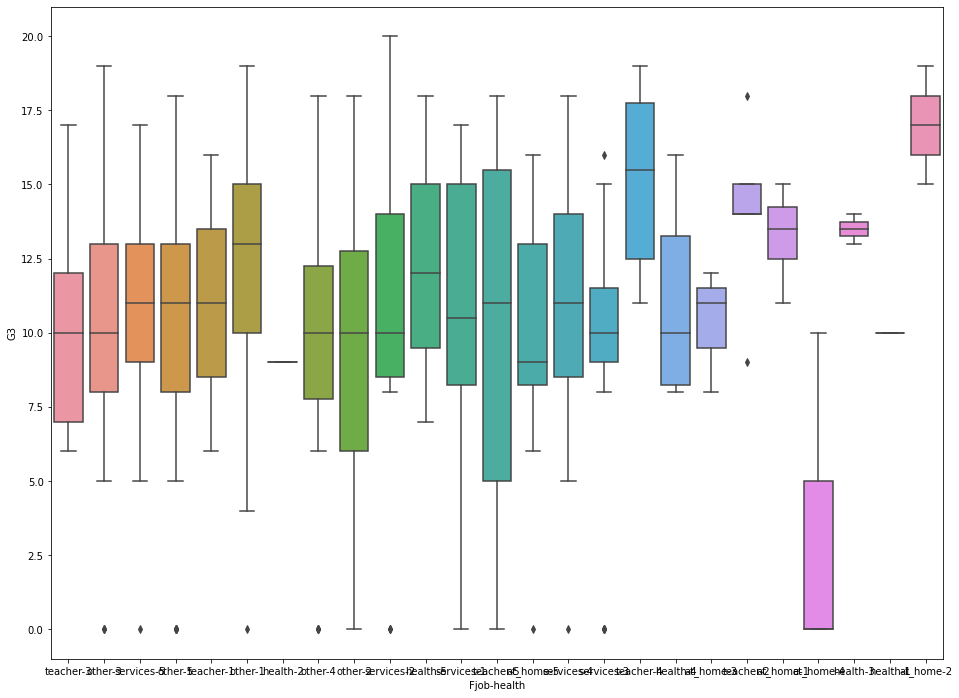

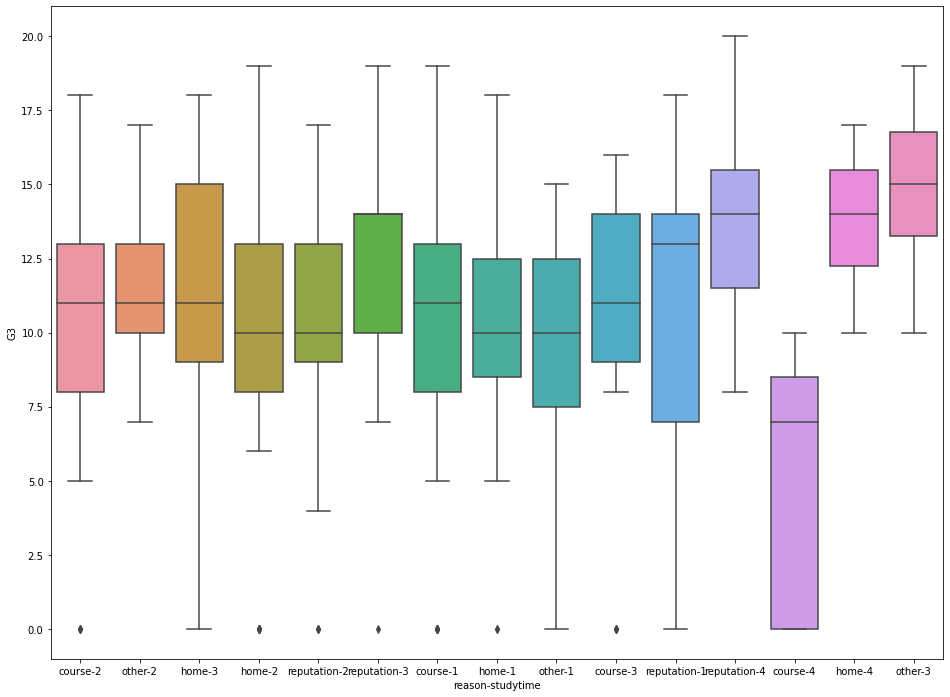

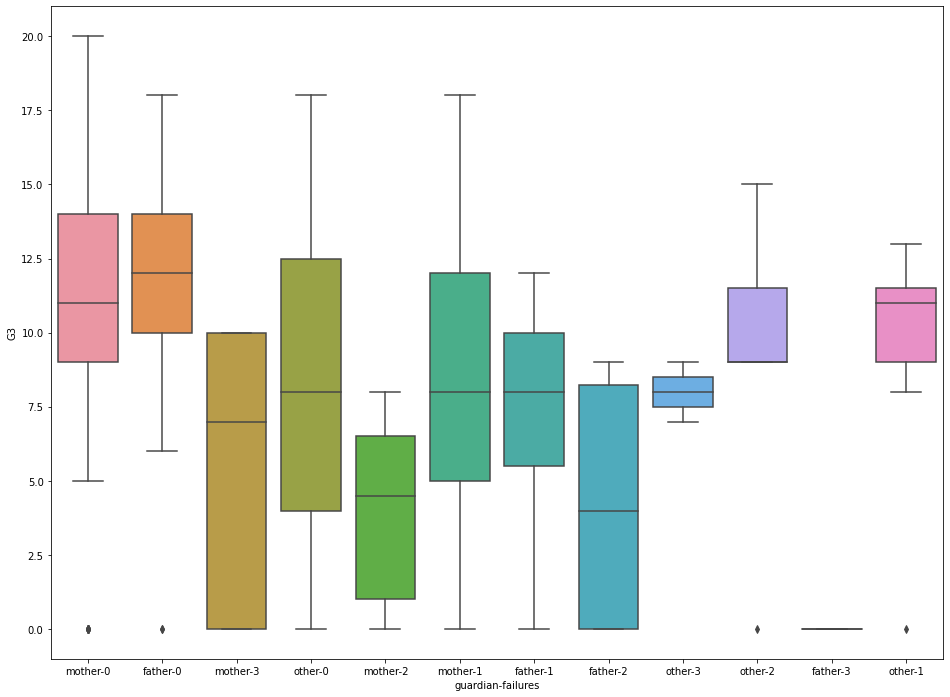

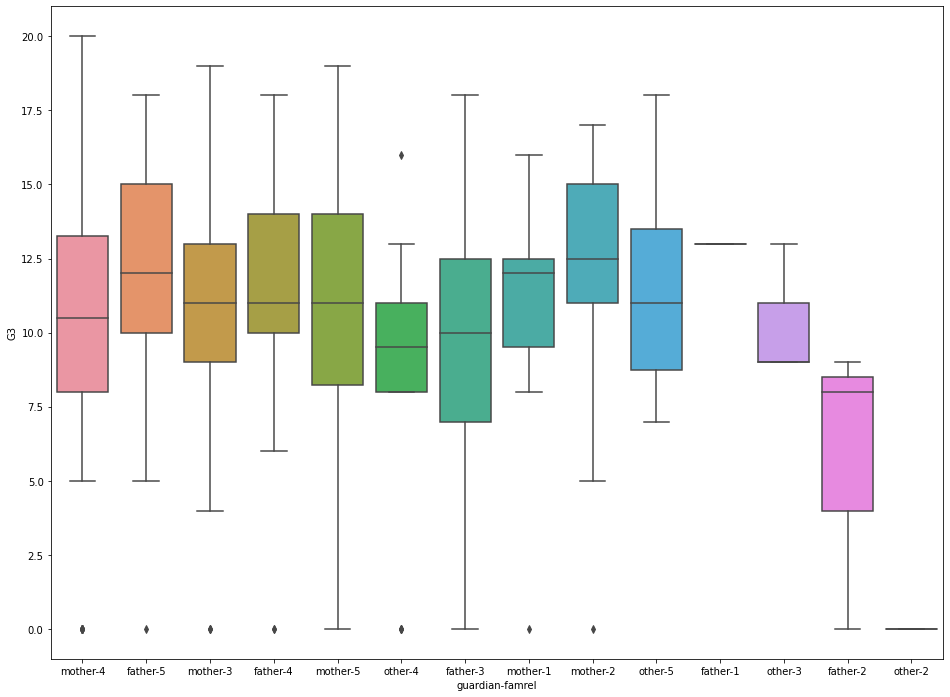

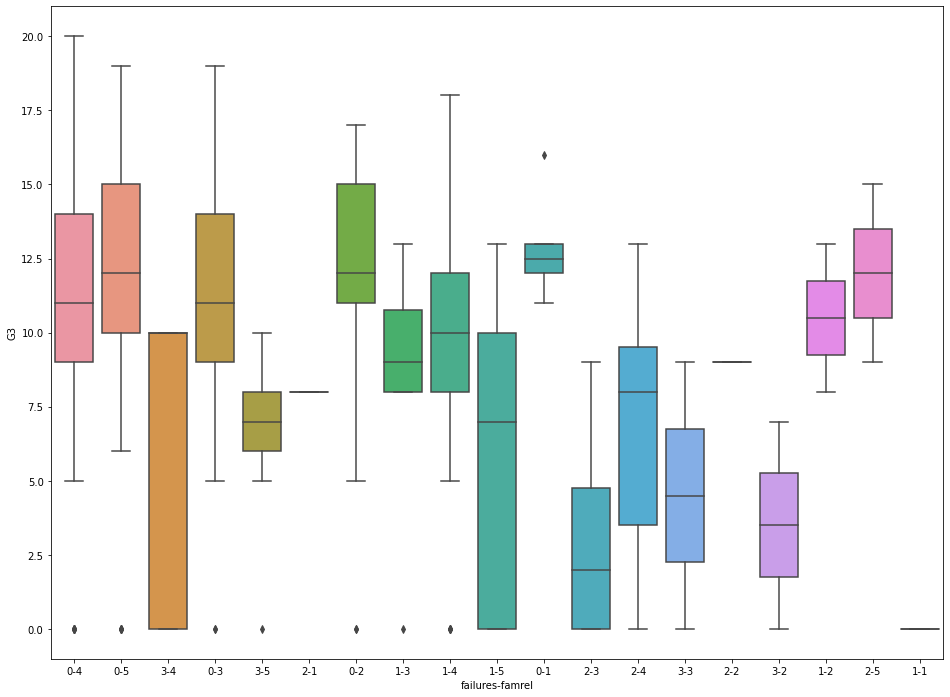

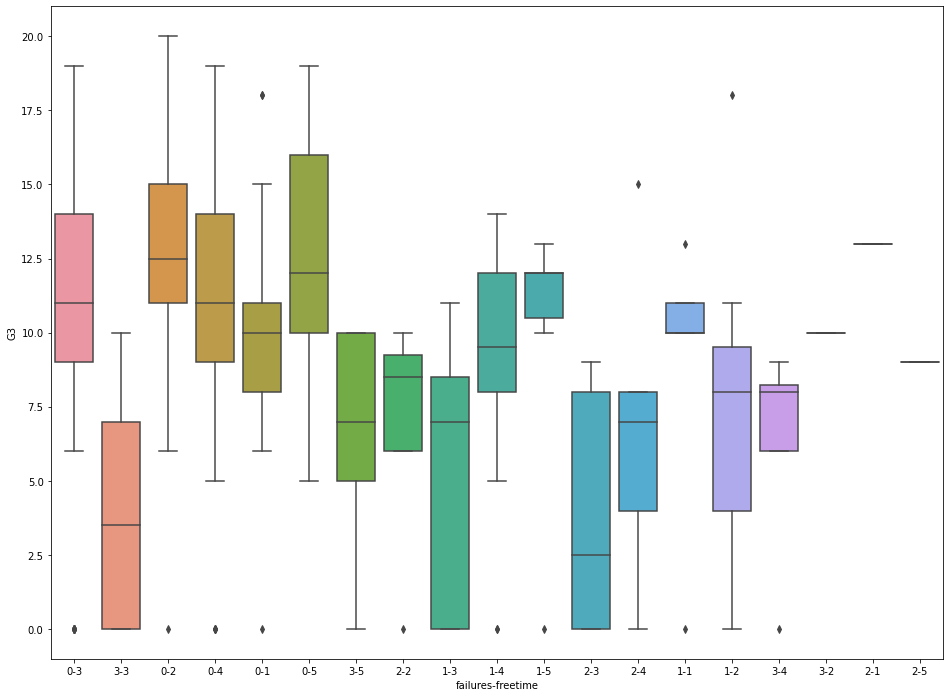

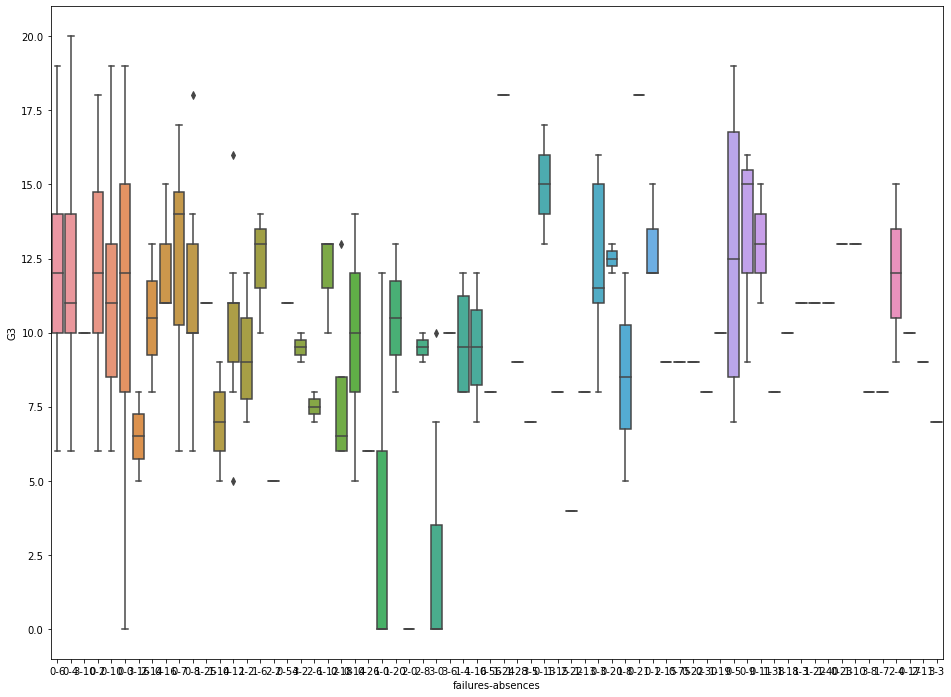

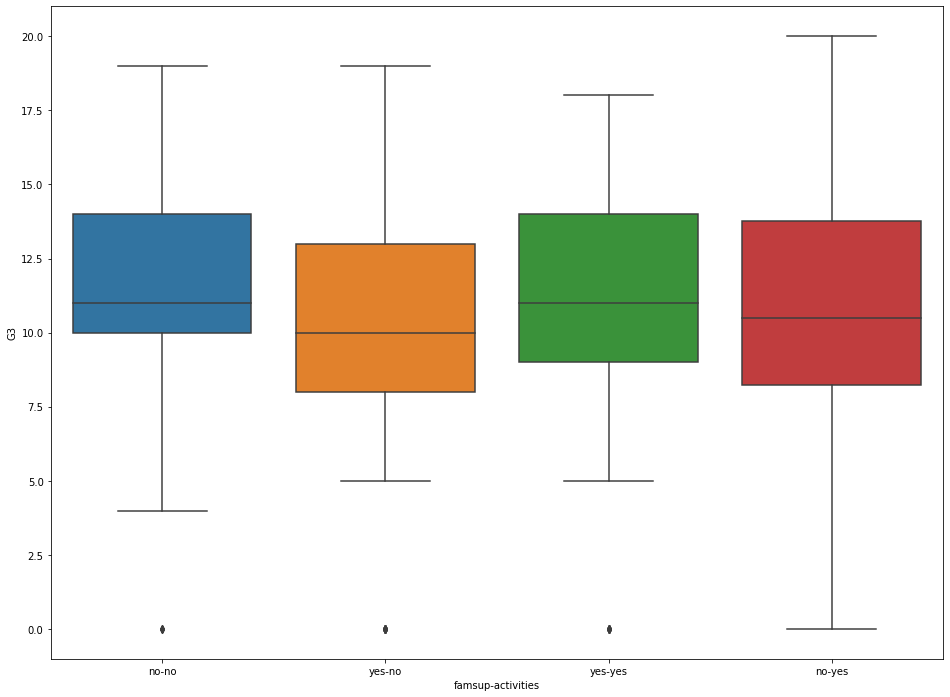

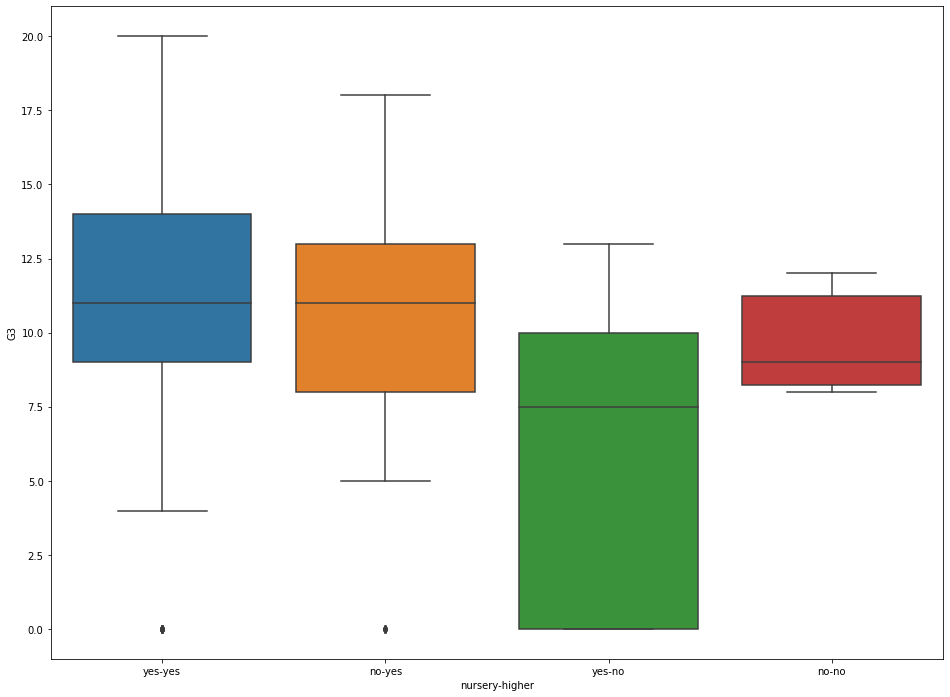

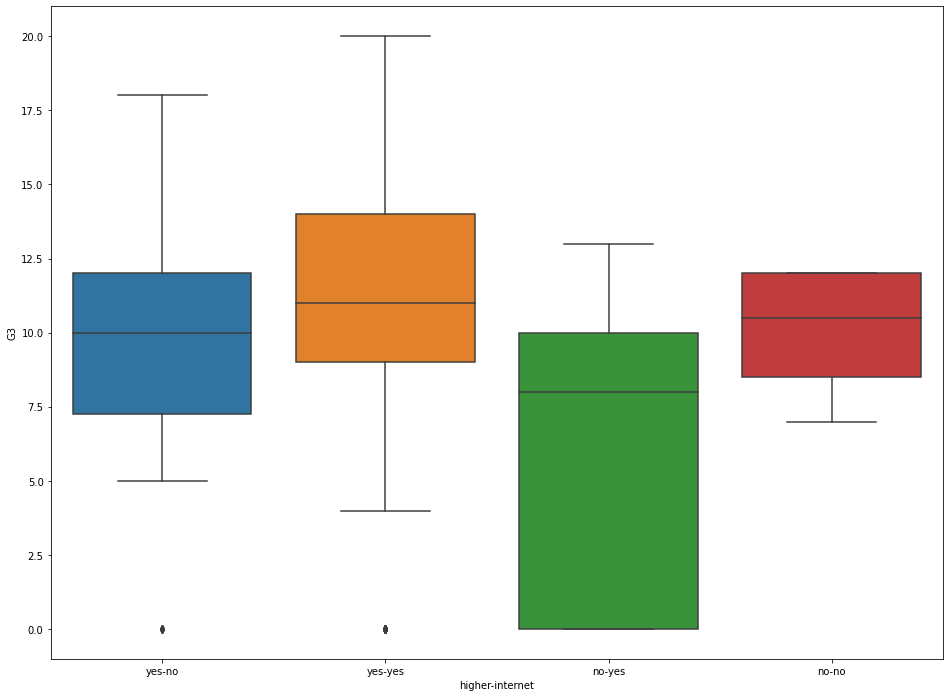

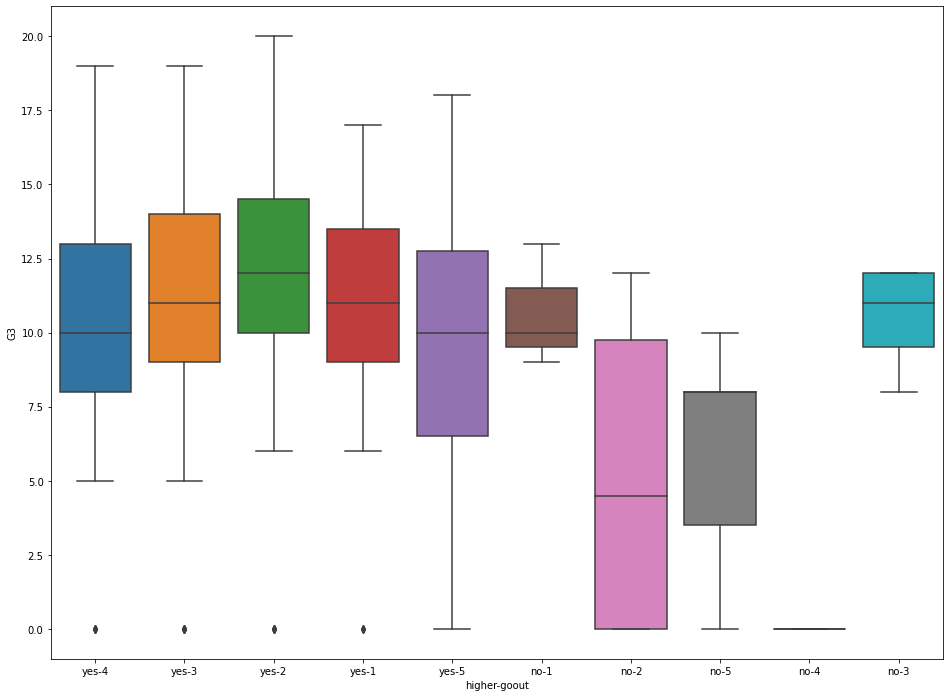

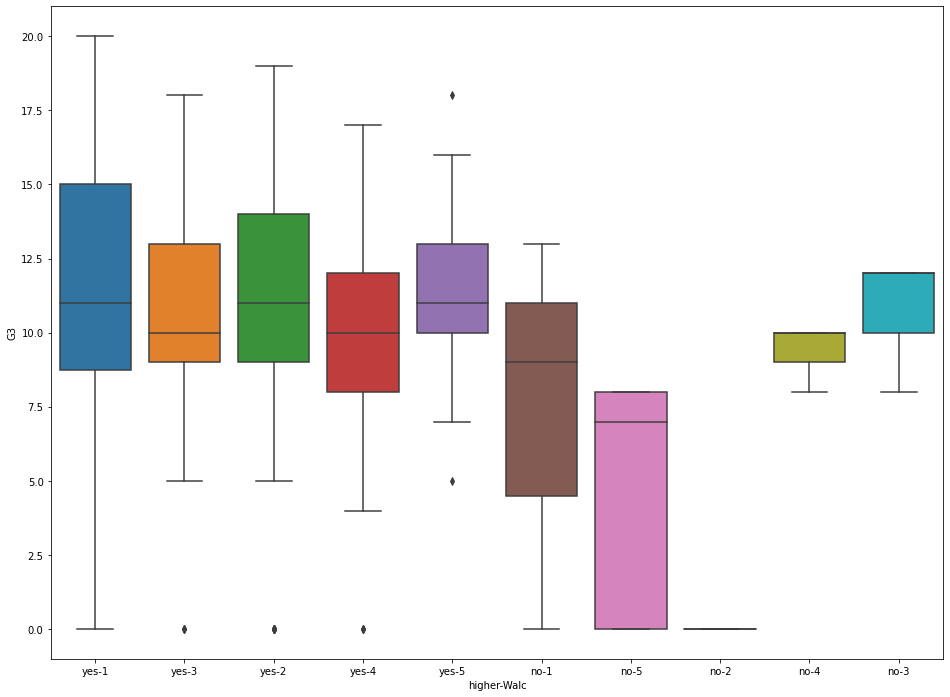

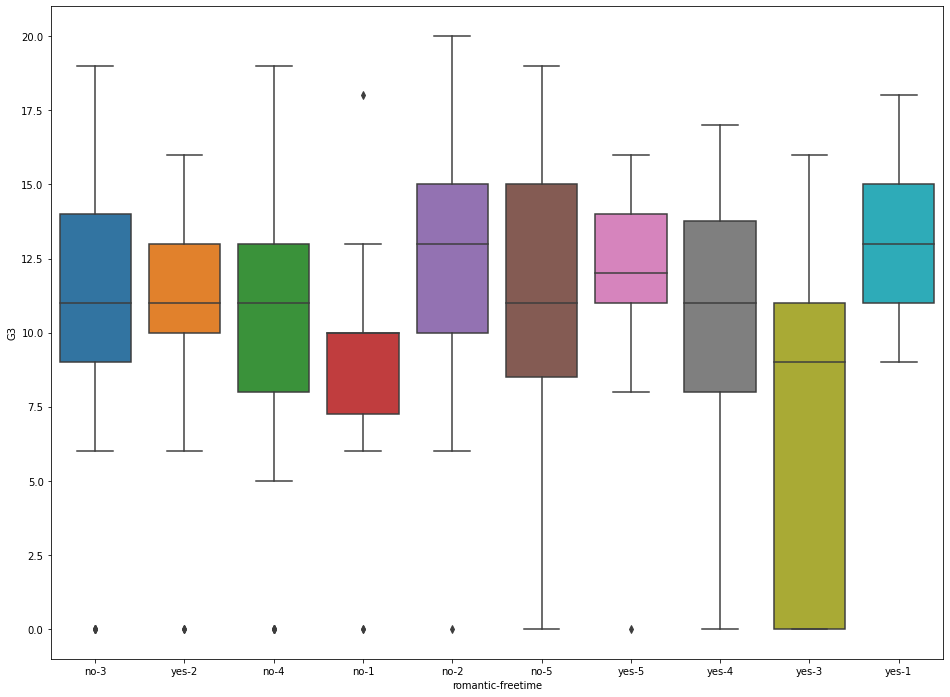

In [11]:
for tmp_df, pair_attr in zip(tmp_dfs, pair_attrs):
    plt.figure(figsize=(16, 12))
    sns.boxplot(data=tmp_df, x=f"{pair_attr['attribute_1']}-{pair_attr['attribute_2']}", y="G3")